<a href="https://colab.research.google.com/github/leegyuhi/oooooooooooooh/blob/master/doitdeeplearning_chapter_5_2~3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5장 훈련 노하우를 배웁니다.  
## 5.1 검증 세트를 나누고 전처리 과정을 배웁니다.  
* 4장 복습  
    1. 유방암 데이터 세트 $\rightarrow$ '훈련세트'와 '테스트 세트'로 나눔  
    2. 훈련세트 $\rightarrow$ fit()메서드에 전달되어 모델을 훈련  
    3. 테스트세트 $\rightarrow$ score()메서드에 전달되어 모델의 성능 평가  

* 5장의 목표  
    '어느 데이터 세트에만 치우친 모델을 만들지 않는 것' $\rightarrow$ __범용능력__을 기르는 것.  

### 테스트 세트로 모델을 튜닝합니다.  
__로지스틱 회귀로 모델 훈련하고 평가하기__

In [0]:
#cancer dataset을 불러 훈련 세트와 테스트 세트 나누기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [0]:
#모델의 성능 평가
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

테스트 세트에서 정확도는 약 83%입니다.  
이 성능이 만족스럽지 않다면 다른 손실 함수를 사용하여도 됩니다.  
* 하이퍼파라미터(Hyperparameter)  
    loss와 같은 매개변수 값은 가중치나 절편처럼 알아서 학습되는 것이 아닌 사용자가 직접 선택해야 합니다.  
    이러한 파라미터들을 __하이퍼파라미터__라 합니다.  

__서포트 벡터 머신으로 모델 훈련하고 평가하기__  
SGDClassifier 클래스의 loss 매개변수를 'log'$\rightarrow$'hinge'로 바꾸면 서포트 벡터 머신(SVM) 문제를 푸는 모델이 만들어집니다.  
(SVM은 '훈련데이터의 클래스를 구분하는 경계선을 찾는 작업')

In [0]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
#책의 오타(x_train이 아닌 x_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

성능 평가 결과를 보니 93%입니다.  
이렇게 모델의 하이퍼파라미터를 조정하는 작업을 __'모델을 튜닝한다'__라고 합니다. 
모델을 튜닝하여 테스트 세트에 대해 좋은 성능을 내는 모델을 만들어 보았습니다.  
하지만 이 모델은 실전에서 좋은 성능을 내지 못할 확률이 높습니다.  

### 테스트 세트로 모델을 튜닝하면 실전에서 좋은 성능을 기대하기 어렵습니다.  
테스트 세트: 실전에 투입된 모델의 성능을 측정하기 위해 사용  
테스트 세트로 모델을 튜닝하게 되면 __'테스트 세트에만 좋은 성능을 보여주는 모델'__이 만들어집니다.  
Ex) 개념을 공부 안하고 답안지만을 외운 사람.  
$\therefore$ 테스트 세트로 모델을 튜닝하면 테스트 세트의 정보가 모델로 새어 나가므로 모델의 일반화 성능이 왜곡됩니다.  

### 검증 세트를 준비합니다.  
이러한 문제의 해결방안으로 모델을 튜닝할 때 테스트 세트를 사용하지 않으면 됩니다.  
즉 모델 튜닝을 위한 세트를 따로 준비하여 모델을 튜닝 합니다. 이 때 테스트 세트는 모델 튜닝을 모두 마치고 실전에 투입되기 전에 딱 한번만 사용하는 것이 좋습니다.  
모델을 튜닝하는 용도의 세트는 __'검증 세트'__라고 하며 훈련 세트를 조금 떼어 만듭니다.  
이 책에서는 훈련세트 80% & 테스트 세트 20% $\rightarrow$ 훈련세트 60% & 검증세트 20% & 테스트 세트20%로 나누었습니다.  

In [0]:
# 데이터 세트 준비하기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [0]:
#검증 세트 분할하기
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))
#(전체 data가 100이면 64:20:16으로 나눔)

364 91


In [0]:
#검증 세트 사용해 모델 평가하기
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

검증 세트로 모델을 평가해보았습니다.  
결과를 보니 그 전에 얻은 평가보다 낮아진 걸 확인할 수 있습니다. 그 이유로는 훈련 세트의 크기가 줄어들었기 때문입니다.  
위스콘신 유방암 데이터 세트의 샘플 수는 적은 편입니다.  
데이터 양이 적으면 검증세트의 비율이나 random_state 매개변수의 값을 조금만 조절해도 성능 평가 점수가 크게 변하는 것입니다.  
이렇게 데이터 양이 적은 경우 검증 세트를 나누지 않고 __'교차검증'__이라는 방법을 사용하기도 합니다.  
일반적으로 검증과 테스트 세트의 샘플 수를 1만 개 이상 확보할 수 있다면 훈련 세트에 많은 샘플을 할당하는 것이 좋습니다.  
Ex) 10만 개 정도의 데이터가 있다면 8:1:1 정도로 분할합니다. 100만 개 이상의 데이터는 98:1:1 정도의 비율로 샘플을 나눕니다.  

### 데이터 전처리와 특성의 스케일을 알아봅니다.  
실제 데이터를 수집하면 머신러닝 패키지에 준비되어 있는 데이터와 달리 잘 가공되어 있지 않습니다.  
누락된 값이 있을 수 있고, 데이터의 형태가 균일하지 않을 수도 있습니다.  
이러한 문제의 해결방안으로 데이터를 적절히 가공하는 __'데이터 전처리'__과정이 필요합니다.  

__특성의 스케일은 알고리즘에 영향을 줍니다.__  
아쉽게도 이 책에서는 제대로 가공되지 않은 데이터를 다루지 않습니다.  
하지만 잘 정리된 데이터도 __특성의 스케일__이 다른 경우 전처리를 해야 합니다.  
__특성의 스케일__이란 어떤 특성이 가지고 있는 값의 범위를 말합니다.  
Ex)사과의 당도/무게

blank|당도|무게
---|---|---
사과1|4|540
사과2|8|700
사과3|2|480

위 표를 보면 사과의 당도의 범위는 1\~10이고 사과의 무게 범위는 500\~1000입니다. 이러한 경우를 __'두 특성의 스케일 차이가 크다'__라고 합니다.  
어떤 알고리즘들은 스케일에 민감하여 모델의 성능에 영향을 줍니다. 이 책에는 신경망 알고리즘들은 모두 경사 하강법을 사용합니다.  
경사 하강법은 스케일에 민감한 알고리즘이므로 특성의 스케일을 맞추는 등의 전처리를 해야합니다.  

### 스케일을 조정하지 않고 모델을 훈련해 볼까요?  
#### 1. 훈련 데이터 준비하고 스케일 비교하기  
특성의 스케일을 비교해야 하므로 유방암 데이터의 __mean perimeter__와 __mean area__ 특성을 가져오겠습니다.

['mean perimeter' 'mean area']


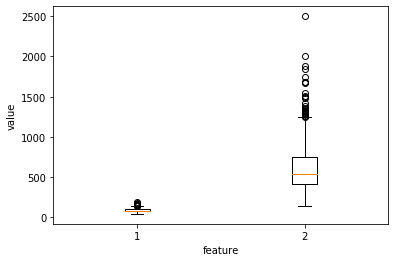

['mean perimeter', 'mean area']

In [0]:
import matplotlib.pyplot as plt
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()
['mean perimeter', 'mean area']

그래프를 보시다싶이 mean perimeter은 주로 100\~200사이에 위치해 있고, mean area는 200\~2000 사이에 값들이 집중되어 있습니다.  
스케일이 다른 두 특성에 경사 하강법 알고리즘을 적용하여 가중치가 어떻게 변할지 보겠습니다.  

#### 2. 가중치를 기록할 변수와 학습률 파라미터 추가하기  
SingleLayer 클래스에 인스턴스 변수를 추가하여 에포크마다 가중치의 값을 저장하여 가중치의 변화를 관찰할 때 사용하겠습니다.  
또 학습률이라는 개념도 도입하겠습니다.


In [0]:
def __init__(self, learning_rate=0.1):
  self.w=None
  self.b=None
  self.losser=[]
  self.w_history=[]
  self.lr=learning_rate
#learning rate는 하이퍼파라미터;'학습률'(가중치의 업데이트 양 조절)

일반적으로 손실 함수는 복잡한 굴곡을 가진 다차원 공간의 초평면입니다.  
만약 가중치를 큰 폭으로 업데이트(학습률을 크게하여) 손실 함수가 최솟값인 점을 지나쳐 버리게 되면 최적의 가중치와 절편을 구할 수 없습니다.  
![KakaoTalk_20191113_162541405](https://user-images.githubusercontent.com/53211502/68741988-68868800-0632-11ea-93ee-89e152cc1817.jpg)  
위의 그림을 보고 __'손실 함수의 표면을 천천히 이동하며 전역 최솟값을 찾는다.'__라고 말하기도 합니다.  
적절한 학습률은 주어진 문제마다 다르지만 보통 0.001, 0.01등의 로그 스케일로 학습률을 지정하여 테스트합니다.  

#### 3. 가중치 기록하고 업데이트 양 조절하기  
이제 fit()메서드에서 가중치가 바뀔 때마다 w\_history 리스트에 가중치를 기록하겠습니다.  
self.w의 값이 바뀔 때마다 그 값을 복사하여 w\_history 리스트에 추가 합니다.  
 w_grad에 학습률 self.lr을 곱하는 연산이 추가되어 가중치 업데이트 양을 조절합니다.


In [0]:
import numpy as np
def fit(self, x, y, epochs=100):
  self.w = np.ones(x.shape[1])                         #가중치를 초기화합니다.
  self.b=0                                             #절편을 초기화합니다. 
  self.w_history.append(self.w.copy())                 #가중치를 기록합니다.
  np.random.seed(42)                                   #무작위로 시드를 지정합니다.
  for i in range(epochs):                              #epochs만큼 반복합니다.
    loss = 0 
    indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞습니다.
    for i in indexes:                                  #모든 샘플에 대해 반복합니다. 
      z = self.forpass(x[i])                           #정방향 계산
      a = self.activation(z)                           #활성화 함수 적용
      err = -(y[i] - a)                                #오차계산
      w_gard, b_grad = self.backprop(x[i], err)        #역방향 계산
      self.w -= self.lr * w_gard                       #가중치 업데이트 (학습률 적용)
      self.b -= b_grad                                 #절편 업데이트
      self.w_history.append(self.w.copy())             #가중치 기록
      a=np.clip(a, 1e-10, 1-1e-10)                     #클리핑한 후 손실 누적(안전한 로그 계산)
      loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) 
    self.losses.append(loss/len(y))                    #에폭마다 평균 손실 저장

In [0]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b    # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err          # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.
        np.random.seed(42)                         # 랜덤 시드를 지정합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다.
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                # 그래디언트에서 페널티 항의 미분 값을 더합니다
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 가중치를 기록합니다.
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y) + self.reg_loss())
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) >= 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])     # 정방향 계산
            a = self.activation(z)         # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

  

#### 4. 모델 훈련하고 평가하기

In [0]:
 layer1 = SingleLayer()
 layer1.fit(x_train, y_train)
 layer1.score(x_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


0.9120879120879121

#### 5. 가중치 그래프 그리기  
가중치의 세 번째, 네 번째 요소는 각각 mean perimeter와 mean area 특성에 대한 가중치입니다. 이 요소로 그래프를 그려보겠습니다.

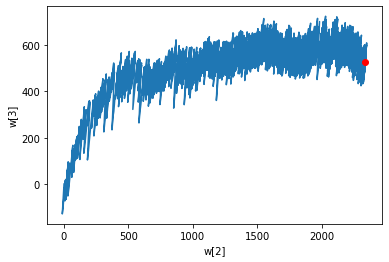

In [0]:
w2 = [] #mean perimeter
w3 = [] #mean area
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

그래프를 보면 가로 축인 mean perimeter에 비해 세로 축인mean area의 스케일이 크므로 w3 값이 학습 과정에서 큰 폭으로 흔드리며 변화하고 있습니다.  
반면에 w2값은 0부터 시작하여 조금씩 최적값에 가까워집니다.  
이러한 그래프 현상을 __'w3에 대한 그레디언트가 크기 때문에 w3 축을 따라 가중치가 크게 요동치고 있다'__라고 합니다.  
즉 w3값이 크게 요동치므로 모델이 불안정하게 수렴한다는 것을 알 수 있습니다.  
이러한 현상을 줄일 수 있는 방법이 바로 __스케일 조정__입니다.

### 스케일을 조정해 모델을 훈련합니다.  
신경망에서 자주 사용하는 스케일 조정 방법 중 하나는 표준화입니다.  
표준화는 특성값에서 평균을 빼고 표준 편차로 나누면 됩니다.  
표준화를 하면 평균이 0이고 분산이 1인 특성이 만들어집니다.  
$$z={{x-\mu} \over s}$$

#### 1. 넘파이로 표준화 구현하기    
넘파이의 mean(), std()함수를 사용하여 쉽게 표준화를 구현할 수 있습니다.  
mean(), std()함수의 axis 매개변수를 0으로 지정하면 2차원 배열의 열을 기준으로 통계치를 계산하여 하나의 행 벡터로 반환해 줍니다.

In [0]:
#평균값 구하기
np.mean([1,2,3,4,5], axis=0)

3.0

In [0]:
#표준 편차 구하기
np.std([1,2,3,4,5], axis=0)

1.4142135623730951

In [0]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

#### 2.모델 훈련하기  
스케일을 조정한 데이터 세트로 단일층 신경망을 다시 훈련시키고 가중치를 그래프로 그려보겠습니다.

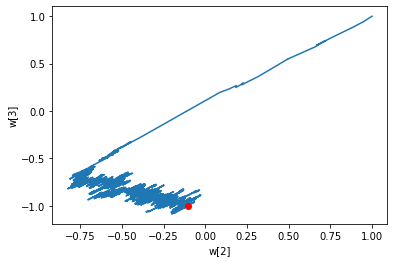

In [0]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

#### 3.모델 성능 평가하기  

In [0]:
layer2.score(x_val, y_val)

0.37362637362637363

#### 4.왜 이런 결과가??!!  
성능이 매우 좋지 않습니다. 그 이유로는 검증 세트의 스케일을 바꾸지 않기 때문입니다.  
검증 세트도 표준화 전처리를 적용하여 정확도를 알아보겠습니다.

In [0]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

나쁘지 않은 정확도를 얻었습니다. 하지만 개선할 점들이 아직 남아있습니다.

### 스케일을 조정한 다음에 실수하기 쉬운 함정을 알아봅니다.  
여기서 언급한 함정이란 __'훈련 세트와 검증 세트가 다른 비율로 스케일이 조정된 경우'__를 말합니다.  
이해를 돕기 위해 원본 세트와 전처리된 세트에서 데이터를 50개 씩 뽑아 산점도를 그린 후 비교해보며 이 함정에 대해 설명하겠습니다.  

#### 1.원본 훈련 세트와 검증 세트로 산점도 그리기

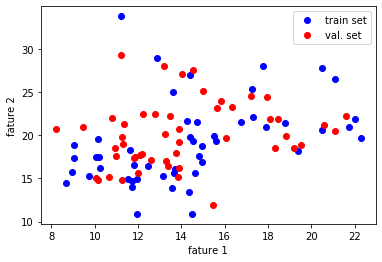

In [0]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

#### 2.전처리한 훈련 세트와 검증 세트로 산점도 그리기

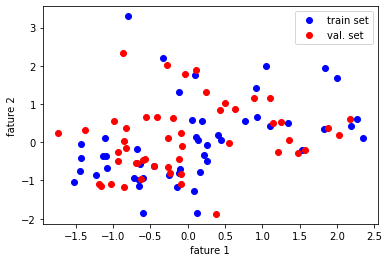

In [0]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

<img width="280" alt="1" src="https://user-images.githubusercontent.com/53211502/68757922-253b1200-0650-11ea-9a40-cc3735aa2cf3.PNG">
<img width="284" alt="2" src="https://user-images.githubusercontent.com/53211502/68757923-25d3a880-0650-11ea-833e-6ebdeda25f25.PNG">

원본과 전처리 후의 훈련, 검증 세트를 보시면 미세하지만 각각 다른비율로 변환되었음을 알 수 있습니다.  
즉 점과 점사이의 거리가 변환된 이후에 그대로 유지되지 않았습니다.  
점과 점사이의 거리가 달라진 이유는 훈련 세트와 검증 세트를 각각 다른 비율로 전처리했기 때문입니다.

#### 3.올바르게 검증 세트 전처리하기  
검증 세트의 스케일이 훈련 세트의 스케일과 다른 비율로 조정되면 모델에 적용된 알고리즘들이 검증 세트와 샘플 데이터를 잘못 인식합니다.  
따라서 검증 세트를 훈련 세트와 같은 비율로 전처리해야 합니다.  
테스트 세트 또한 마찬가지 입니다.  
$\therefore$ 검증세트의 평균, 표준편차를 이용하는 것이 아닌 훈련 세트의 평균, 표준 편차를 사용하여 검증 세트를 변환하면 됩니다.

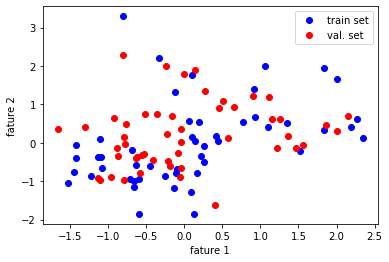

In [0]:
x_val_scaled = (x_val - train_mean) / train_std

plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

<img width="284" alt="4" src="https://user-images.githubusercontent.com/53211502/68758754-beb6f380-0651-11ea-81d7-d7f38e1316df.PNG">
<img width="283" alt="3" src="https://user-images.githubusercontent.com/53211502/68758755-beb6f380-0651-11ea-964c-ef034a706a28.PNG">

이제 원본 데이터의 산점도와 스케일 조정 후의 산점도 가 같아졌습니다.  
즉 검증 세트와 훈련 세트가 동일한 비율로 변환되었습니다.

#### 4.모델 평가하기  
이 검증 세트로 모델의 성능을 평가해 보겠습니다.  
현재의 데이터 세트는 크지 않기 때문에 검증 세트를 올바르게 전처리하기 전과 후의 성능이 동일합니다.  
만약 검증 세트가 클 경우 성능에 차이가 나타날 수 있습니다.   

In [0]:
layer2.score(x_val_scaled, y_val)

0.967032967032967

## 5.2 과대적합과 과소적합을 알아봅시다.  
훈련 세트와 검증 세트는 모델의 __과대적합(overfitting)__, __과소적합(underfitting)__이라는 문제와 깊은 연관이 있습니다.  

### 학습 곡선을 통해 과대적합과 과소적합을 알아봅니다.  
* 과대적합  
    모델이 훈련 세트에서는 좋은 성능을 내지만 검증 세트에서는 낮은 성능을 내는 경우를 말합니다.  
    구체적인 예로는 훈련 세트의 정확도가 99%이고 검증 세트의 정확도가 80% 수준이라면 과대적합을 의심할 수 있습니다.  
* 과소적합  
    훈련 세트와 검증 세트의 성능에는 차이가 크지 않지만 모두 낮은 성능을 내는 경우입니다.  

__훈련 세트의 크기와 과대적합, 과소적합 분석하기__  
훈련 세트의 크기에 따라 과대적합과 과소적합이 어떻게 나타나는지 그래프를 통해 알아 보겠습니다. 다음과 같은 그래프를 학습 곡선(learning curve)이라고 부릅니다.  
![과대적합](https://user-images.githubusercontent.com/53211502/68759959-15bdc800-0654-11ea-99db-95eb2976ccfc.jpg)  
* 첫 번째 학습 곡선 : 과대적합의 전형적인 모습입니다.  
    훈련 세트와 검증세트에서 측정한 성능의 간격이 큽니다.  
    $\rightarrow$ 과대적합된 모델을 __'분산이 크다(high variance)'__라고도 말합니다.  
    과대적합의 주요 원인 중 하나는 훈련 세트에 충분히 다양한 패턴의 샘플이 포함되지 않은 경우입니다.  
    이런 경우에는 더 많은 훈련 샘플을 모아 검증 세트의 성능을 향상시킬 수 있습니다.  
    하지만 현실적인 한계로 훈련 샘플을 더 모을 수 없는 경우에는 모델이 훈련 세트에 집착하지 않도록 가중치를 제한할 수 있습니다.  
    $\rightarrow$  이를__'모델의 복잡도를 낮춘다'__라고 말하기도 합니다.  
    이 방법은 5.3절에서 자세히 알아보겠습니다.  
* 두 번째 학습곡선 : 과소적합의 전형적인 모습입니다.  
    훈련 세트와 검증 세트에서 측정한 성능의 간격은 점점 가까워지지만 성능 자체가 낮습니다.  
    $\rightarrow$ 과소적합된 모델을 __'편향이 크다'__라고도 말합니다.  
    과소적합은 모델이 충분히 복잡하지 않아 훈련 데이터에 있는 패턴을 모두 잡아내지 못하는 현상입니다.  
    과소적합을 해결하는 대표적인 방법은 복잡도가 더 높은 모델을 사용하거나 가중치의 규제를 완화하는 것 입니다.  
* 세 번째 학습곡선 : 과대적합과 과소적합 사이에서 절충점을 찾은 모습

__에프크와 손실 함수의 그래프로 과대적합과 과소적합 분석하기__  
4장에서 배운 에포크와 손실 함수의 그래프를 사용하여 과대적합과 과소적합을 분석하기도 합니다.  
<img width="239" alt="8" src="https://user-images.githubusercontent.com/53211502/68761564-a944c800-0657-11ea-80e1-509b1171bafb.PNG">  

그래서 에포크에 대한 손실 함수의 그래프를 __학습 곡선__이라고 부르는 경우도 종종 있습니다. 다음은 에포크와 손실 함수에 대한 그래프와 __에포크__와 __정확도__에 대한 그래프입니다.  
![25](https://user-images.githubusercontent.com/53211502/68762008-95e62c80-0658-11ea-9aea-bf773a8f5595.jpg)
* 왼쪽 그래프  
검증 세트의 손실과 훈련 세트의 손실을 나타낸 것입니다.  
훈련 세트의 손실은 에포크가 진행될수록 감소하지만  
검증 세트의 손실운 에포크의 횟수가 최적점을 지나면 오히려 상승합니다.  
최적점 이후에도 계속해서 훈련 세트로 모델을 학습시키면 모델이 훈련 세트의 샘플에 더 밀착하여 학습하기 때문입니다.  
즉, 모델이 과대적합되기 시작합니다.  
반대로 최적점 이전에는 훈련 세트와 검증 세트의 손실이 비슷한 간격을 유지하면서 함께 줄어드는데, 이 영역에서 학습을 중지하면 과소적합된 모델이 만들어 집니다.  
* 오른쪽 그래프  
오른쪽 그래프는 y축에 손실 대신 정확도를 사용하였습니다.  
낮은 손실이 높은 정확도를 뜻하므로 그래프가 뒤집혔을 뿐 해석은 동일합니다.  

__모델 복잡도와 손실 함수의 그래프로 과대적합과 과소적합 분석하기__  
가로 축에 에포크 대신 __'모델 복잡도'__를 넣어 그래프를 표현하기도 합니다.  
![51](https://user-images.githubusercontent.com/53211502/68762007-95e62c80-0658-11ea-84d7-f077e925a82b.jpg)  

* __모델 복잡도__  
    모델이 가진 학습 가능한 가중치 개수를 말하는데, 층의 개수나 유닛의 개수가 많아지면 높은 모델이 만들어집니다.  
    모델이 복잡해지면 항상 좋을 것 같지만 모델이 훈련 세트에만 잘 맞는 형태로 만들어지면 훈련 세트에만 좋은 성능을 냅니다.  

다음으로는 적절한 에포크 횟수를 찾아보겠습니다.

### 적절한 편향-분산 트레이드오프를 선택합니다.  
과소적합된 모델 $\rightarrow$ __'편향되었다'__  
과대적합된 모델 $\rightarrow$ __'분산이 크다'__  
과소적합된 모델(편향)과 과대적합된 모델(분산)사이의 관계를 편향-분산 트레이드 오프라고 합니다.  
트레이드오프라는 말이 들어간 이유는 __'하나를 얻기 위해서는 다른 하나를 희생해야 하기 때문'__입니다.  
이 말은 즉슨 편향을 줄이면(훈련 세트의 성능을 높이면) 분산이 커지고(검증 세트와 성능 차이가 커지고)  
반대로 분산을 줄이면(검증 세트와 성능차이를 줄이면) 편향이 커지는(훈련 세트의 성능이 낮아진다는) 것을 뜻합니다.  
$\therefore$ 분산이나 편향이 너무 커지지 않도록 적절한 중간 지점을 선택해야 합니다.  
이러한 행위를 __'적절한 편향-분산 트레이드오프를 선택했다.'__라고 합니다.  
경사 하강법의 에포크 횟수에 대한 모델의 손실을 그래프로 그려 '적절한 편향-분산 트레이드오프'를 선택해 보겠습니다.  

#### 1.검증 손실을 기록하기 위한 변수 추가하기  
훈련 세트의 손실을 기록했듯이 검증 세트에 대한 손실을 기록한 다음 기록한 값으로 그려보겠습니다.  
이를 위해 SingleLayer 클래스의 \_\_init__()메서드에 self.val\_losses를 추가합니다.

In [0]:
def __init__(self, learning_rate=0.1):
  self.w = None
  self.b = None
  self.losses = []
  self.val_losses = []
  self.w_history = []
  self.lr = learning_rate

#### 2.fit()메서드에 검증 세트를 전달받을 수 있도록 x_val, y_val 매개변수를 추가합니다.  

In [0]:
def fit(self, x, y, epochs=100, x_val=None, y_val=None):
  self.w = np.ones(x.shape[1])                         #가중치를 초기화합니다. 
  self.b = 0                                           #절편을 초기화합니다.
  self.w_history.append(self.w.copy())                 #가중치를 기록합니다.
  np.random.seed(42)                                   #무작위로 시드를 지정합니다. 
  for i in range(epochs):                              #epochs만큼 반복합니다. 
    loss = 0
    indexes = np.random.permutation(np.arrange(len(x)))#인덱스를 섞습니다. 
    for i in indexes:                                  #모든 샘플에 대해 반복합니다. 
      z = self.forpass(x[i])                           #정방향 계산
      a = self.activation(z)                           #활성화 함수 적용
      err = -(y[i] - a)                                #오차 계산
      w_grad, b_grad = self.backprop(x[i], err)        #역방향 계산
      self.w -= self.lr * w_grad                       #가중치 업데이트
      self.b -= b_grad                                 #절편 업데이트
      self.w_history.append(self.w.copy())             #가중치를 기록
      a = np.clip(a, 1e-10, 1-1e-10)
      loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
    self.losses.append(loss/len(y))                    #에포크마다 평균 손실을 저장
    self.update_val_loss(x_val, y_val)                 #검증 세트에 대한 손실 계산

#### 3.검증 손실 계산하기  
검증 세트의 손실은 다음과 같이 update_val_loss() 메서드에서 계산합니다.  

In [0]:
def update_val_loss(self, x_val, y_val):
  if x_val is None:
    return
  val_loss = 0
  for i in range(len(x_val)):
    z = self.forpass(x_val[i]) #정방향 계산
    a = self.activation(z)     #활성화 함수 적용
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
  self.val_losses.append(val_loss/len(y_val))

이 계산은 fit()메서드에서 훈련 세트의 손실을 계산하는 방식과 동일합니다.  
검증 세트 샘플을 정방향으로 계산한 다음 활성화 함수를 통과시켜 출력 값을 계산합니다.  
이 값을 사용하여 로지스틱 손실 함수의 값을 계산해서 val_losses 리스에 추가합니다.  
그 후 검증 세트에 대한 손실 함수 값을 계산하기 위해 fit() 메서드에서 에포크마다 1번씩 update\_val\_loss()메서드를 호출합니다.


In [0]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b    # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err          # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())       # 가중치를 기록합니다.
        np.random.seed(42)                         # 랜덤 시드를 지정합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다.
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                # 그래디언트에서 페널티 항의 미분 값을 더합니다
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 가중치를 기록합니다.
                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y) + self.reg_loss())
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(x_val, y_val)
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) >= 0                   # 스텝 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])     # 정방향 계산
            a = self.activation(z)         # 활성화 함수 적용
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

#### 4.모델 훈련하기  
이제 모델의 수정을 완료했음으로 표준화(전처리)된 훈련 세트와 검증 세트를 이용하여 단일층 신경망을 훈련해 보겠습니다.

In [0]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

#### 5.손실값으로 그래프 그려 에포크 횟수 지정하기  
위의 값들을 이용하여 그래프를 그려보겠습니다.  

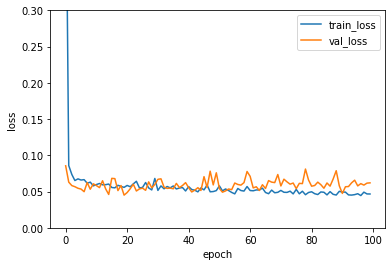

In [0]:
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

이 그래프를 보면 검증 손실이 대략 20번째 에포크 이후에 훈련 세트보다 높아지는 것을 알 수 있습니다.  
즉 이 모델은 20번의 에포크 이후에는 훈련할 필요가 없는 것 같습니다.  

#### 6.훈련 조기 종료하기  
20번의 에포크까지 모델을 훈련한 다음 검증 세트의 성능을 확인해 보겠습니다.  

In [0]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

In [0]:
layer5 = SingleLayer()
layer5.fit(x_train_scaled, y_train, epochs=30)
layer5.score(x_val_scaled, y_val)

0.978021978021978

In [0]:
layer6 = SingleLayer()
layer6.fit(x_train_scaled, y_train, epochs=40)
layer6.score(x_val_scaled, y_val)

0.978021978021978

이렇게 훈련을 일찍 멈추는 기법을 조기 종료라고 부릅니다.  
과대적합되기 전에 훈련을 멈추었으므로 검증 세트의 성능이 0.967 $\rightarrow$ 0.978로 조금 더 향상되었습니다.

# Ch.5 훈련 노하우를 배웁니다.

## 05-3 규제 방법을 배우고 단일층 신경망에 적용합니다
- 가중치 규제(regulariztion) : 가중치의 값이 커지지 않도록 제한하는 기법
  - 과대적합을 해결하는 대표적인 방법 중 하나
  - 모델의 일반화 성능 향상
- '모델이 일반화되지 않았다' 

![graph](https://user-images.githubusercontent.com/52767505/68754705-8bbd3180-064a-11ea-94e2-94046b1b7bee.PNG)![graph_2](https://user-images.githubusercontent.com/52767505/68754732-98da2080-064a-11ea-912b-d5ffd13655e1.PNG)
  - 모델이 몇 개의 데이터에 집착하면 새로운 데이터에 적응하지 못하므로 좋은 성능을 가졌다고 할 수 없다.
- L1 규제와 L2 규제

### L1 규제
- 손실 함수에 가중치의 절댓값인 L1 노름(norm) 추가
  $$\left \| \omega  \right \|_{1}=\sum_{i=1}^{n}\left | \omega _{i} \right |$$
- 로지스틱 손실 함수
  $$L=-(ylog(a)+(1-y)log(1-a))$$
  - $\alpha$ : 규제의 양을 조절하는 파라미터
    $$L=-(ylog(a)+(1-y)log(1-a))+\alpha \sum_{i=1}^{n}\left | \omega _{i} \right |$$
    - $\alpha$ 증가 $\rightarrow$ $\omega$ 값의 합 감소 $\rightarrow$ 규제 강화
    - $\alpha$ 감소 $\rightarrow$ $\omega$ 값의 합 증가, 손실 함수 값의 증가폭 low $\rightarrow$ 규제 약화


### L1 규제의 미분
- 경사 하강법으로 가중치를 업데이트하기 위해 L1 규제를 적용한 로지스틱 손실 함수 미분
- 로지스틱 손실 함수 미분 (04장)
$$\frac{\partial }{\partial \omega _{i}}L=-(y-a)x_{i}$$
$$\frac{\partial }{\partial b}L=-(y-a)1$$
- L1 규제 미분
  $$\frac{\partial }{\partial \omega }L=-(y-a)x+\alpha\times sign(\omega )$$
  - sign($\omega$) : $\omega$ 값을 미분한 결과인 $\omega$의 부호
  - 가중치 업데이트
  $$\omega =\omega -\eta \frac{\partial L}{\partial \omega }=\omega +\eta ((y-a)x-\alpha\times sign(\omega ))$$
- L1 규제를 추가한 로지스틱 손실 함수를 경사 하강법으로 최적화
```
w_grad += alpha * np.sign(w)
```
  - 절편에 대한 규제 $\times$
    - 절편을 규제하면 모델을 어떤 방향으로 이동시킬 뿐, 복잡도에는 영향을 주지 않는다.

- 라쏘 모델(Lasso model) : 회귀 모델에 L1 규제를 추가한 것
  - 사이킷런 : sklearn.linear_model.Lasso 클래스
  - SGDClassifier 클래스 : penalty 매개변수 값을 l1으로 지정
  - 규제의 강도는 alpha 매개변수로 제어
  - 가중치가 0인 특성 : 특성 선택 가능
  - L1 규제는 규제 하이퍼파라미터 $\alpha$에 의존
    - 가중치 크기에 따른 규제의 양이 변하지 않음
    - 규제 효과가 좋지 않음

### L2 규제
- 손실 함수에 가중치에 대한 L2 노름의 제곱을 더함
$$\left \| \omega  \right \|_{2}=\sqrt{\sum_{i=1}^{n}\left | \omega _{i} \right |^{2}}$$
- 로지스틱 손실 함수
$$L=-(ylog(a)+(1-y)log(1-a))+\frac{1}{2}\alpha \sum_{i=1}^{n}\left | \omega_{i}  \right |^{2}$$

### L2 규제의 미분
- L2 규제 미분
$$\frac{\partial }{\partial \omega x}L=(y-a)x+\alpha \times \omega $$
- 가중치 업데이트
$$\omega =\omega -\eta \frac{\partial L}{\partial \omega }=\omega +\eta ((y-a)x+\alpha \times \omega )$$
- L2 규제를 경사 하강법 알고리즘에 적용
```
w_grad += alpha * w
```
  - gradient 계산에 가중치 값 자체를 포함
  - 가중치를 완전히 0으로 만들지 않음 $\rightarrow$ 모델의 복잡도 증가


- 릿지 모델(Ridge model) : 회귀 모델에 L2 규제를 적용한 것
  - 사이킷런 : sklearn.linear_model.Ridge 클래스
  - SDGClassifier 클래스 : penalty 매개변수를 l2로 지정
  - 규제의 강도는 alpha 매개변수로 제어

### L1 규제와 L2 규제 정리
- L1 규제 : gradient에서 alpha에 가중치의 부호를 곱하여 gradient에 더한다.
```
w_grad += alpha * np.sign(w)
```
- L2 규제 : gradient에서 alpha에 가중치를 곱하여 gradient에 더한다.
```
w_grad += alpha * w
```

### 로지스틱 회귀에 규제를 적용합니다.
#### 1. 그레디언트 업데이트 수식에 페널티 항 반영하기
  - `__init__()`메서드에 L1 규제와 L2 규제의 강도를 조절하는 매개변수 l1과 l2를 추가
  - l1과 l2의 기본값은 0 : 규제 적용 안 함

In [0]:
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.l1 = l1
        self.l2 = l2

#### 2. `fit()` 메서드에서 역방향 계산을 수행할 때, 그레디언트에 페널티 항의 미분값을 더함
  - L1 규제와 L2 규제 동시 수행 가능

In [0]:
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])                #가중치 초기화
        self.b = 0                                  #절편 초기화
        self.w_history.append(self.w.copy())        #가중치 기록
        np.random.seed(42)                          #무작위로 시드 지정
        for i in range(epochs):                     #에포크만큼 반복
            loss = 0

            #인덱스를 섞습니다.
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                       #모든 샘플에 대해 반복
                z = self.forpass(x[i])              #정방향 계산
                a = self.activation(z)              #활성화 함수 적용
                err = -(y[i] - a)                   #오차 계산
                w_grad, b_grad = self.backprop(x[i], err)     #역방향 계산

                #그레디언트에서 패널티 항의 미분값을 더합니다.
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad          #가중치 업데이트
                self.b -= b_grad                    #절편 업데이트

                #가중치를 기록합니다.
                self.w_history.append(self.w.copy())

                #안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
                a = np.clop(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))

            #에포크마다 평균 손실을 저장합니다.
            self.losses.append(loss / len(y) + self.reg_loss())

            #검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

#### 3. 로지스틱 손실 함수 계산에 페널티 항 추가
  - `reg_loss()` 메서드를 추가
    - 훈련 세트의 로지스틱 손실 함수의 값 계산
    - 검증 세트의 로지스틱 손실 함수의 값 계산

In [0]:
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

#### 4. 검증 세트의 손실을 계산하는 `update_val_loss()` 메서드에서 `reg_loss()`를 호출하도록 수정

In [0]:
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i]) * np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

In [0]:
class SingleLayer:
    def __init__(self, lr=0.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = lr
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  
        return z

    def backprop(self, x, err):
        w_grad = x * err  
        b_grad = 1 * err  
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))  
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])                
        self.b = 0                                 
        self.w_history.append(self.w.copy())       
        np.random.seed(42)                         
        for i in range(epochs):                    
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      
                z = self.forpass(x[i])           
                a = self.activation(z)          
                err = -(y[i] - a)                 
                w_grad, b_grad = self.backprop(x[i], err)     
                w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
                self.w -= self.lr * w_grad         
                self.b -= b_grad                   
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))
            self.losses.append(loss / len(y) + self.reg_loss())
            self.update_val_loss(x_val, y_val)

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    
        return np.array(z) > 0                  
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
        
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i]) * np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

#### 5. cancer 데이터 세트에 L1 규제 적용하기
- L1 규제의 강도에 따른 모델의 학습 곡선과 가중치의 변화
  - 학습 곡선 그래프 : 규제 증가 $\rightarrow$ 훈련 세트와 검증 세트의 손실 모두 증가 (과소적합 현상)
  - 가중치 그래프 : 규제 강도 l1 값 증가 $\rightarrow$ 가중치 값이 0에 가까워짐


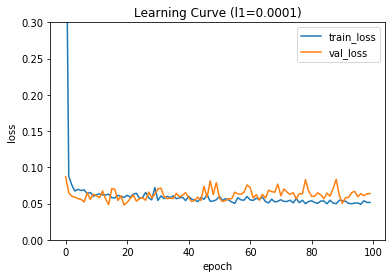

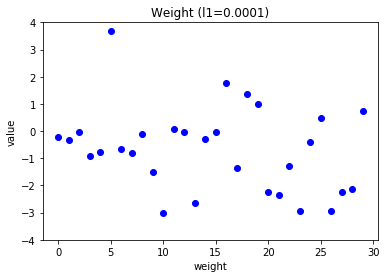

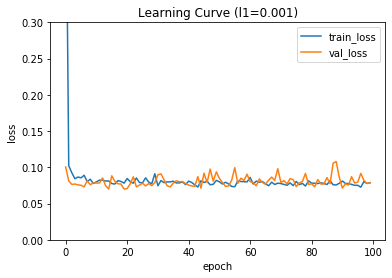

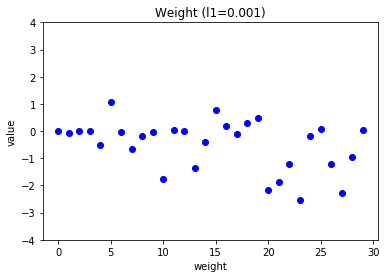

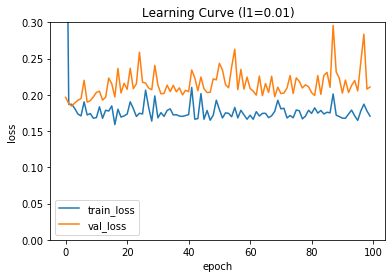

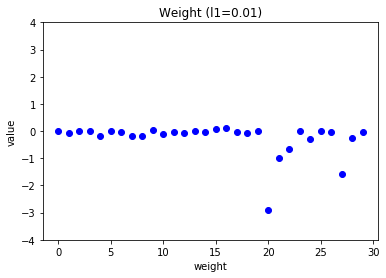

In [0]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

- 적절한 l1 하이퍼파라미터 값 : `l1 = 0.01`

In [0]:
layer5 = SingleLayer(lr=0.01)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

#### 6. cancer 데이터 세트에 L2 규제 적용하기
- L2 규제도 L1 규제와 비슷한 양상을 보임
- 규제 강도가 강해져도(l2=0.01) 과소적합이 심해지지는 않음, 가중치가 너무 0에 가깝게 가지 않음

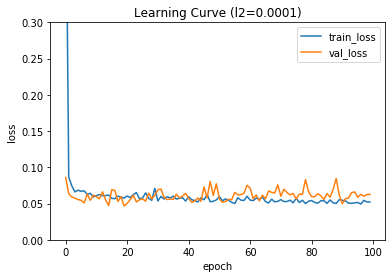

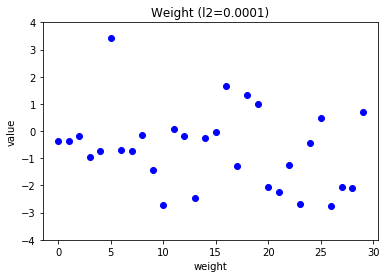

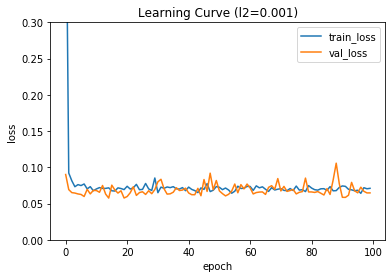

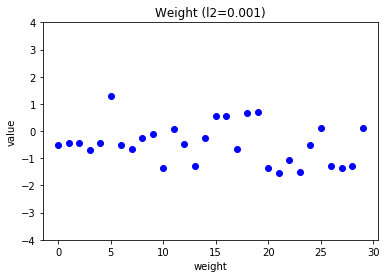

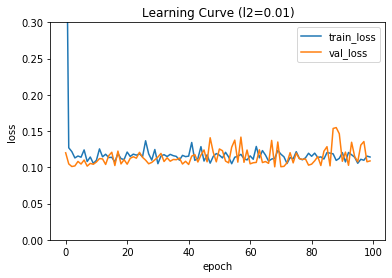

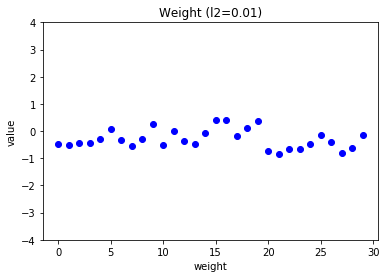

In [0]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

- 성능 평가 : l2=0.01, epochs=50
  - 샘플의 갯수가 적어 L1 규제와 L2 규제에 큰 차이 없음

In [0]:
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.978021978021978

- 옳게 예측한 샘플의 개수

In [0]:
np.sum(layer6.predict(x_val_scaled) == y_val)

89

#### 7. SGDClassifier에서 규제 사용하기
- penalty 매개변수에 l1이나 l2를 매개변수 값으로 전달
- alpha 매개변수에 규제의 강도 지정
- cancer 데이터 세트를 사용, SGDClassifier 모델에 L2 규제 적용

In [0]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

## 05-4 교차 검증을 알아보고 사이킷런으로 수행해 봅니다.
- 모델을 훈련시킬 데이터가 부족한 경우, 교차 검증(cross validation) 이용

### 교차 검증의 원리를 알아봅시다.
- 폴드(fold) : 훈련 세트를 나눈 작은 덩어리

![폴드](https://user-images.githubusercontent.com/52767505/68755399-c7a4c680-064b-11ea-8b96-5c9f44ef4ad7.PNG)
  - 교차검증
    - 전체 데이터 세트 8:2
    - 8에 해당하는 훈련 세트 / 5
    - 작은 덩어리를 1번씩 검증에 사용, 나머지 덩어리를 훈련에 사용
- 교차 검증 과정
     1. 훈련 세트를 k개의 폴드로 나눕니다. : k-폴드 교차 검증
     2. 첫 번째 폴드를 검증 세트로 사용하고 나머지 폴드(k-1개)를 훈련 세트로 사용합니다.
     3. 모델을 훈련한 다음에 검증 세트로 평가합니다.
     4. 차례대로 다음 폴드를 검증 세트로 사용하여 반복합니다.
     5. k개의 검증 세트로 k번 성능을 평가한 후 계산된 성능의 평균을 내어 최종 성능을 계산합니다.

- k-폴드 교차 검증
  - 모든 훈련 세트가 평가에 1번씩 사용 $\rightarrow$ 검증 점수가 안정적
  - 기존의 훈련 방법보다 더 많은 데이터로 훈련 가능
      - ex) k=10 : 10개의 폴드, 90% 샘플을 훈련에 사용
      - 기존) 훈련 : 검증 : 데이터 = 6 : 2 : 2 $\rightarrow$ 60% 샘플을 훈련에 사용

### k-폴드 교차 검증을 구현합니다.
#### 1. 훈련 세트 사용하기
- 기존
  - 전체 데이터 세트 $\rightarrow$ 훈련 세트 : 테스트 세트 = 8 : 2
  - 훈련 세트 $\rightarrow$ 훈련 세트 : 검증 세트 = 8 : 2
- k-폴드 교차 검증 : 검증 세트가 훈련 세트에 포함
  - x_train_all와 y_train_all를 훈련과 검증에 사용
  - validation_scores 리스트 정의, 각 폴드의 검증 점수 저장
  - validation_scores 리스트의 값 평균으로 최종 검증 점수 계산

In [0]:
validation_scores = []

#### 2. k-폴드 교차 검증 구현하기
- k-폴드 교차 검증을 위한 반복문 구현
  - k = 10
  - bins 변수 : 한 폴드에 들어갈 샘플의 개수
    - 전체 훈련 세트의 샘플 개수를 k로 나눈 것
  - bins 변수의 개수만큼 건너뛰며 검증 폴드와 훈련 폴드를 구분하여 모델 훈련
  - 성능 평가의 평균 점수 np.mean(validation_scores

In [0]:
k = 10
bins = len(x_train_all) // k

for i in range(k):
    start = i*bins
    end = (i+1)*bins
    val_fold = x_train_all[start:end]
    val_target = y_train_all[start:end]
    
    train_index = list(range(0, start))+list(range(end, len(x_train)))
    train_fold = x_train_all[train_index]
    train_target = y_train_all[train_index]
    
    train_mean = np.mean(train_fold, axis=0)
    train_std = np.std(train_fold, axis=0)
    train_fold_scaled = (train_fold - train_mean) / train_std
    val_fold_scaled = (val_fold - train_mean) / train_std
    
    lyr = SingleLayer(l2=0.01)
    lyr.fit(train_fold_scaled, train_target, epochs=50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score)

print(np.mean(validation_scores))

0.9711111111111113


- start, end : 검증 폴드 샘플의 시작과 끝 인덱스
- 그 외 : 훈련 폴드 샘플의 인덱스
  - train_index에 list( ) 함수를 이용하여 훈련 폴드의 인덱스 저장

  ![폴드_인덱스](https://user-images.githubusercontent.com/52767505/68757601-8b736500-064f-11ea-8673-0095582f0af0.PNG)
- 훈련 데이터의 표준화 전처리 : 폴드를 나눈 뒤 수행
  - 폴드를 나누기 전 수행 : 검증 폴드의 정보 누설
- validation_scores 리스트 : 반복문은 진행하며 10개의 검증 폴드로 측정한 성능 점수는 저장
- np.mean( ) 함수 : 성능 점수들의 평균 계산

### 사이킷런으로 교차 검증을 합니다.
#### 1. cross_validate( ) 함수로 교차 검증 점수 계산하기
- 매개변수 값 : 교차 검증 모델의 객체와 훈련 데이터, 타깃 데이터
- cv 매개변수 : 교차 검증을 수행할 폴드 수 지정


In [0]:
from sklearn.model_selection import cross_validate

sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))

0.850096618357488


- cross_validate( ) 함수 : 파이썬 딕셔너리 반환
- scores['test_score'] : 검증 점수 저장
- 교차 검증의 평균 점수 = 85%
  - 낮은 점수
  - 표준화 전처리 수행 $\times$

### 전처리 단계를 포함해 교차 검증을 수행합니다.
- 훈련 세트 전체를 전처리한 후 cross_validate( ) 함수에 매개변수 값으로 전달 $\rightarrow$ 검증 폴드가 표준화 전처리 단계에서 누설

#### Pipeline 클래스를 사용해서 교차 검증 수행하기
- Pipeline 클래스 : 검증 폴드가 전처리 단계에서 누설되지 않도록 전처리 단계와 모델 클래스를 하나로 연결해 주는 클래스
- Pipeline 클래스와 SGDClassifier 클래스의 작동 과정
  1. 표준화 전처리 단계와 SGDClassifier 클래스 객체를 Pipeline 클래스로 감싸 cross_validate( ) 함수에 전달
  2. cross_validate( ) 함수가 훈련 세트를 훈련 폴드와 검증 폴드로 나눔
  3. Pipeline 클래스 객체에서 전처리 단계와 SGDClassifier 클래스 객체의 수행
- 파이프라인 객체 생성 : 사이킷런에서 제공하는 make_pipeline( ) 함수에 전처리 단계와 모델 객체 전달
- 표준화 전처리 수행 : preprocessing 모듈 밑 StandardScaler 클래스
- 파이프라인 객체 생성 후, 교차 검증 점수 출력
  - 평균 검증 점수 증가
    - 표준화 전처리 단계가 훈련 폴드와 검증 폴드에 적절히 적용

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


- 훈련 폴드의 점수 출력
  - cross_validate( ) 함수에 return_train_score 매개변수를 True로 설정

In [0]:
print(np.mean(scores['train_score']))

0.9875478561631581
